<a href="https://colab.research.google.com/github/danicattaneob/2_Entrega_Mentoria_Cattaneo/blob/master/2_Entrega_Mentoria_Cattaneo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Antes de empezar:**
- [Instalar spaCy y el modelo de lenguaje con el que van a trabajar](https://spacy.io/models#quickstart)

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### Librerías

In [4]:
!pip3 install spotipy
!pip3 install pandas
!pip3 install spacy
!pip3 install nltk
!pip install lyricsgenius
!pip install matplotlib

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

     |████████████████████████████████| 92kB 4.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### Dependencias y acceso al API

In [5]:
import pandas as pd
import numpy as np
import spotipy
import spacy
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius
import re
import nltk
from collections import Counter
from nltk import ngrams
from nltk import word_tokenize

import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp = spacy.load("en_core_web_sm") #completar con el modelo que van a utilizar

In [ ]:
nltk.download() # Download "punkt" package

### 1) Plantear una pregunta que quieran responder con estos datos

Las preguntas pueden ser por ejemplo: 
- ¿Por qué este artista destaca dentro de su género?
- ¿Por qué no lo hace?
- ¿Por qué un género musical es más escuchado que otro?

Sin embargo, pueden usar cualquier afirmación que hayan leído en internet y que se pueda responder con los datos este trabajo para validarla o rechazarla.

Premisa: Evolucion de los temas en las canciones más escuchadas a traves de los años

In [ ]:
client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
genius = lyricsgenius.Genius("OtFPbJc-k810b7O1b8eHoulVehZdraZ56WprKivuhNkNefyDtBiWKI2nBhUTEbxi")
genius.verbose = False

### 2) Obtener datos para responder la pregunta

Para extraer las letras de las canciones usaremos la [API de MusiXmatch](https://developer.musixmatch.com/documentation) a través de su [wrapper en Python](https://github.com/hudsonbrendon/python-musixmatch).
Una vez obtenidas las letras de las canciones, las procesaremos de la siguiente manera:
1. Tokenizar
2. Remover las [stop-words](https://es.wikipedia.org/wiki/Palabra_vac%C3%ADa)
3. [Lema](https://es.wikipedia.org/wiki/Lema_(ling%C3%BC%C3%ADstica))tizar las palabras que hayan quedado
4. Organizar todo en un DataFrame de la forma Canción-Artista-Letra donde Letra es el resultado de 3.

**Recomendación** : Usar un dataframe para su artista y otro para la competencia si es que eligierone esa opción, les va a ahorrar tiempo.

**Aclaración** : Si plantearon una pregunta que no requiera los datos de la consigna, obtengan esos datos.

In [7]:
corpus_df = pd.DataFrame(columns=('artist_name', 'song_name', 'decade', 'lyrics'))

In [8]:
all_out_60 = sp.playlist_tracks("spotify:playlist:4X0EJu9PsM9c6nnNJ5ZAOk")

pending = []
count = 1

for song in all_out_60["items"]:
  # print("Song: " + song["track"]["name"], end=" - ")
  name = song["track"]["name"]
  for artist in song["track"]["artists"]:
      # print("Artist: " + artist["name"])
      try:
        artist_found = genius.search_artist(artist["name"], max_songs=1)
        break
      except:
        pending.append(artist["name"] + name)
  if artist_found is not None:
    try:
      song_found = genius.search_song(name, artist=artist_found.name)
    except:
      pending.append(artist["name"] + name)
    if song_found is not None:
      #print(song_found.lyrics)
      song_data = {'artist_name': artist["name"], 'song_name': name, 'decade': "60s", 'lyrics': song_found.lyrics}
      corpus_df = corpus_df.append(song_data, ignore_index=True)
      print("Added #"+ str(count) + ": " + song_data['artist_name'] + " - " + song_data['song_name'])
      count += 1

corpus_df

Added #1: Aretha Franklin - I Say a Little Prayer
Added #2: Elvis Presley - Can't Help Falling in Love
Added #3: Marvin Gaye - I Heard It Through The Grapevine
Added #4: Neil Sedaka - Breaking Up Is Hard to Do
Added #5: Creedence Clearwater Revival - Bad Moon Rising
Added #6: The Turtles - Happy Together
Added #7: Ben E. King - Stand By Me
Added #8: Nat King Cole - L-O-V-E
Added #9: Frankie Valli - Can't Take My Eyes Off You
Added #10: Janis Joplin - Cry Baby
Added #11: Elvis Presley - Suspicious Minds
Added #12: Frank Sinatra - Somethin' Stupid
Added #13: Louis Armstrong - What A Wonderful World
Added #14: Roy Orbison - Oh, Pretty Woman
Added #15: The Righteous Brothers - Unchained Melody
Added #16: Frank Sinatra - My Way
Added #17: Elvis Presley - It's Now or Never
Added #18: The Velvet Underground - Pale Blue Eyes
Added #19: Paul Anka - Put Your Head On My Shoulder
Added #20: Bob Dylan - Blowin' in the Wind
Added #21: The Doors - Light My Fire
Added #22: Elvis Presley - Stuck on You

,artist_name,song_name,decade,lyrics
0,Aretha Franklin,I Say a Little Prayer,60s,[Verse 1]\n(I say a little prayer for you)\nTh...
1,Elvis Presley,Can't Help Falling in Love,60s,[Verse 1]\nWise men say only fools rush in\nBu...
2,Marvin Gaye,I Heard It Through The Grapevine,60s,[Verse 1]\nI bet you're wondering how I knew\n...
3,Neil Sedaka,Breaking Up Is Hard to Do,60s,You tell me that you're leaving\nI can't belie...
4,Creedence Clearwater Revival,Bad Moon Rising,60s,[Verse 1]\nI see the bad moon arising\nI see t...
...,...,...,...,...
58,The Doors,The End,60s,[Intro]\n\n[Chorus]\nThis is the end\nBeautifu...
59,The Kinks,Sunny Afternoon,60s,[Instrumental Intro]\n\n[Verse 1]\nThe tax man...
60,Cream,White Room,60s,[Intro]\n\nIn a white room with black curtains...
61,Harry Nilsson,"Everybody's Talkin' - From ""Midnight Cowboy""",60s,Everybody's talking at me\nI don't hear a word...


In [9]:
all_out_90 = sp.playlist_tracks("spotify:playlist:0erlzEph4QjQzxwUPUhv99")

count = 1
for song in all_out_90["items"]:
  # print("Song: " + song["track"]["name"], end=" - ")
  name = song["track"]["name"]
  for artist in song["track"]["artists"]:
      # print("Artist: " + artist["name"])
      try:
        artist_found = genius.search_artist(artist["name"], max_songs=1)
        break
      except:
        pending.append(artist["name"] + name)
  if artist_found is not None:
    try:
      song_found = genius.search_song(name, artist=artist_found.name)
    except:
      pending.append(artist["name"] + name)
    if song_found is not None:
      #print(song_found.lyrics)
      song_data = {'artist_name': artist["name"], 'song_name': name, 'decade': "90s", 'lyrics': song_found.lyrics}
      corpus_df = corpus_df.append(song_data, ignore_index=True)
      print("Added #"+ str(count) + ": " + song_data['artist_name'] + " - " + song_data['song_name'])
      count += 1

corpus_df

Added #1: Backstreet Boys - I Want It That Way
Added #2: Natalie Imbruglia - Torn
Added #3: Aerosmith - Crazy
Added #4: Oasis - Wonderwall
Added #5: Eagle-Eye Cherry - Save Tonight
Added #6: Radiohead - Creep
Added #7: Sinéad O'Connor - Nothing Compares 2 U
Added #8: Extreme - More Than Words
Added #9: Deep Blue Something - Breakfast At Tiffany's
Added #10: Red Hot Chili Peppers - Under the Bridge
Added #11: Simply Red - For Your Babies
Added #12: Spice Girls - Wannabe
Added #13: The Cure - Friday I'm In Love
Added #14: Oasis - Don't Look Back in Anger
Added #15: R.E.M. - Losing My Religion
Added #16: Eric Clapton - Tears In Heaven
Added #17: Radiohead - High And Dry
Added #18: Roxette - Spending My Time
Added #19: Guns N' Roses - November Rain
Added #20: The Cranberries - Linger
Added #21: Simply Red - Stars
Added #22: Fools Garden - Lemon Tree
Added #23: Radiohead - Karma Police
Added #24: The Wallflowers - One Headlight
Added #25: 4 Non Blondes - What's Up?
Added #26: Jamiroquai - V

,artist_name,song_name,decade,lyrics
0,Aretha Franklin,I Say a Little Prayer,60s,[Verse 1]\n(I say a little prayer for you)\nTh...
1,Elvis Presley,Can't Help Falling in Love,60s,[Verse 1]\nWise men say only fools rush in\nBu...
2,Marvin Gaye,I Heard It Through The Grapevine,60s,[Verse 1]\nI bet you're wondering how I knew\n...
3,Neil Sedaka,Breaking Up Is Hard to Do,60s,You tell me that you're leaving\nI can't belie...
4,Creedence Clearwater Revival,Bad Moon Rising,60s,[Verse 1]\nI see the bad moon arising\nI see t...
...,...,...,...,...
142,New Radicals,You Get What You Give,90s,"[Intro]\nOne, two!\nOne, two, three, ow!\n\n[V..."
143,Macy Gray,I Try,90s,"[Verse 1]\nGames, changes and fears\nWhen will..."
144,The Corrs,What Can I Do,90s,I haven't slept at all in days\nIt's been so l...
145,Soul Asylum,Runaway Train,90s,[Verse 1]\nCall you up in the middle of the ni...


In [10]:
all_out_10 = sp.playlist_tracks("spotify:playlist:4g3Qslviw5FcPUUQ1CdpIn")

count = 1
for song in all_out_10["items"]:
  # print("Song: " + song["track"]["name"], end=" - ")
  name = song["track"]["name"]
  for artist in song["track"]["artists"]:
      # print("Artist: " + artist["name"])
      try:
        artist_found = genius.search_artist(artist["name"], max_songs=1)
        break
      except:
        pending.append(artist["name"] + name)
  if artist_found is not None:
    try:
      song_found = genius.search_song(name, artist=artist_found.name)
    except:
      pending.append(artist["name"] + name)
    if song_found is not None:
      #print(song_found.lyrics)
      song_data = {'artist_name': artist["name"], 'song_name': name, 'decade': "10s", 'lyrics': song_found.lyrics}
      corpus_df = corpus_df.append(song_data, ignore_index=True)
      print("Added #"+ str(count) + ": " + song_data['artist_name'] + " - " + song_data['song_name'])
      count += 1

corpus_df

Added #1: Ed Sheeran - Thinking out Loud
Added #2: Justin Bieber - Sorry
Added #3: Coldplay - A Head Full of Dreams
Added #4: Kodaline - All I Want
Added #5: Shawn Mendes - Señorita
Added #6: Sam Smith - I'm Not The Only One
Added #7: Avicii - Wake Me Up - Radio Edit
Added #8: Lady Gaga - Shallow - Radio Edit
Added #9: Ed Sheeran - Photograph
Added #10: Adele - All I Ask
Added #11: Bruno Mars - When I Was Your Man
Added #12: John Mayer - Love on the Weekend
Added #13: MAGIC! - Rude
Added #14: Coldplay - Adventure of a Lifetime
Added #15: Ed Sheeran - Perfect
Added #16: Passenger - Let Her Go
Added #17: Kodaline - High Hopes
Added #18: Adele - Someone Like You
Added #19: Bruno Mars - Just the Way You Are
Added #20: Lady A - Need You Now
Added #21: Coldplay - Paradise
Added #22: Capital Cities - Safe and Sound
Added #23: Milky Chance - Stolen Dance
Added #24: Adele - When We Were Young
Added #25: Bruno Mars - Locked out of Heaven
Added #26: Maroon 5 - Sugar
Added #27: The Lumineers - Ho 

,artist_name,song_name,decade,lyrics
0,Aretha Franklin,I Say a Little Prayer,60s,[Verse 1]\n(I say a little prayer for you)\nTh...
1,Elvis Presley,Can't Help Falling in Love,60s,[Verse 1]\nWise men say only fools rush in\nBu...
2,Marvin Gaye,I Heard It Through The Grapevine,60s,[Verse 1]\nI bet you're wondering how I knew\n...
3,Neil Sedaka,Breaking Up Is Hard to Do,60s,You tell me that you're leaving\nI can't belie...
4,Creedence Clearwater Revival,Bad Moon Rising,60s,[Verse 1]\nI see the bad moon arising\nI see t...
...,...,...,...,...
231,Bruno Mars,Grenade,10s,"[Verse 1]\nEasy come, easy go, that's just how..."
232,P!nk,Try,10s,[Intro]\nEver wonder about what he's doing\nHo...
233,Sia,Chandelier,10s,[Verse 1]\nParty girls don't get hurt\nCan't f...
234,Katy Perry,Firework,10s,[Verse 1]\nDo you ever feel like a plastic bag...


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
corpus_df

,artist_name,song_name,decade,lyrics
0,Aretha Franklin,I Say a Little Prayer,60s,[Verse 1]\n(I say a little prayer for you)\nTh...
1,Elvis Presley,Can't Help Falling in Love,60s,[Verse 1]\nWise men say only fools rush in\nBu...
2,Marvin Gaye,I Heard It Through The Grapevine,60s,[Verse 1]\nI bet you're wondering how I knew\n...
3,Neil Sedaka,Breaking Up Is Hard to Do,60s,You tell me that you're leaving\nI can't belie...
4,Creedence Clearwater Revival,Bad Moon Rising,60s,[Verse 1]\nI see the bad moon arising\nI see t...
...,...,...,...,...
231,Bruno Mars,Grenade,10s,"[Verse 1]\nEasy come, easy go, that's just how..."
232,P!nk,Try,10s,[Intro]\nEver wonder about what he's doing\nHo...
233,Sia,Chandelier,10s,[Verse 1]\nParty girls don't get hurt\nCan't f...
234,Katy Perry,Firework,10s,[Verse 1]\nDo you ever feel like a plastic bag...


In [24]:
corpus_df.to_csv(F'/content/gdrive/My Drive/Diplo datos/Mentoria/2. Entrega/corpus.csv', index = False)

### 3) Encontrar los n-gramas (n= 1, 2) más comunes y usarlos en gráficos.
Utilizando las librerías de la celda de abajo obtendremos los conjuntos de 1 y 2 palabras más comunes para cada artista con el que trabajaremos. Luego usaremos los unigramas para graficar una [word-cloud](https://i.imgur.com/8I8aJ1N.png) y un gráfico de distribución de frecuencia para unigramas y bigramas por autor (o de la forma que se adapte a su pregunta).

In [125]:
corpus_df

,artist_name,song_name,decade,lyrics
0,Aretha Franklin,I Say a Little Prayer,60s,[Verse 1]\n(I say a little prayer for you)\nTh...
1,Elvis Presley,Can't Help Falling in Love,60s,[Verse 1]\nWise men say only fools rush in\nBu...
2,Marvin Gaye,I Heard It Through The Grapevine,60s,[Verse 1]\nI bet you're wondering how I knew\n...
3,Neil Sedaka,Breaking Up Is Hard to Do,60s,You tell me that you're leaving\nI can't belie...
4,Procol Harum,A Whiter Shade Of Pale,60s,[Intro]\n\n[Verse 1]\nWe skipped the light fan...
...,...,...,...,...
232,Bruno Mars,Grenade,10s,"[Verse 1]\nEasy come, easy go, that's just how..."
233,P!nk,Try,10s,[Intro]\nEver wonder about what he's doing\nHo...
234,Sia,Chandelier,10s,[Verse 1]\nParty girls don't get hurt\nCan't f...
235,Katy Perry,Firework,10s,[Verse 1]\nDo you ever feel like a plastic bag...


In [ ]:
counter_60s = Counter()
counter_nouns_60s = Counter()
counter_adj_60s = Counter()
counter_verbs_60s = Counter()

for i,row in corpus_df.iterrows():
    if row['decade'] == '60s':
        lyrics = corpus_df.at[i,'lyrics']
        lyrics = re.sub('\[(.*?)\]', '', lyrics)
        doc = nlp(lyrics)
        lyrics_clean = ""
        lyrics_nouns = ""
        lyrics_adj = ""
        lyrics_verbs = ""
        for word in doc:
          if not word.is_stop and not word.is_punct and not word.is_space and not word.like_num:
            lyrics_clean += " " + word.lemma_
            if word.pos_ == "NOUN":
              lyrics_nouns += " " + word.lemma_
            elif word.pos_ == "ADJ":
              lyrics_adj += " " + word.lemma_
            elif word.pos_ == "VERB":
              lyrics_verbs += " " + word.lemma_
        token = nltk.word_tokenize(lyrics_clean)
        bigrams = ngrams(token,1)
        counter_60s.update(bigrams)

        token_nouns = nltk.word_tokenize(lyrics_nouns)
        bigrams_nouns = ngrams(token_nouns,1)
        counter_nouns_60s.update(bigrams_nouns)

        token_adj = nltk.word_tokenize(lyrics_adj)
        bigrams_adj = ngrams(token_adj,1)
        counter_adj_60s.update(bigrams_adj)

        token_verbs = nltk.word_tokenize(lyrics_verbs)
        bigrams_verbs = ngrams(token_verbs,1)
        counter_verbs_60s.update(bigrams_verbs)

dict_60s = {}
for item in counter_60s:
  word =  str(item)[2:-3]
  dict_60s[word] = counter_60s[item]

dict_nouns_60s = {}
for item in counter_nouns_60s:
  word =  str(item)[2:-3]
  dict_nouns_60s[word] = counter_nouns_60s[item]

dict_adj_60s = {}
for item in counter_adj_60s:
  word =  str(item)[2:-3]
  dict_adj_60s[word] = counter_adj_60s[item]

dict_verbs_60s = {}
for item in counter_verbs_60s:
  word =  str(item)[2:-3]
  dict_verbs_60s[word] = counter_verbs_60s[item]

# counter_verbs_60s.most_common()

In [ ]:
counter_90s = Counter()
counter_nouns_90s = Counter()
counter_adj_90s = Counter()
counter_verbs_90s = Counter()

for i,row in corpus_df.iterrows():
    if row['decade'] == '90s':
        lyrics = corpus_df.at[i,'lyrics']
        lyrics = re.sub('\[(.*?)\]', '', lyrics)
        doc = nlp(lyrics)
        lyrics_clean = ""
        lyrics_nouns = ""
        lyrics_adj = ""
        lyrics_verbs = ""
        for word in doc:
          if not word.is_stop and not word.is_punct and not word.is_space and not word.like_num:
            lyrics_clean += " " + word.lemma_
            if word.pos_ == "NOUN":
              lyrics_nouns += " " + word.lemma_
            elif word.pos_ == "ADJ":
              lyrics_adj += " " + word.lemma_
            elif word.pos_ == "VERB":
              lyrics_verbs += " " + word.lemma_
        token = nltk.word_tokenize(lyrics_clean)
        bigrams = ngrams(token,1)
        counter_90s.update(bigrams)

        token_nouns = nltk.word_tokenize(lyrics_nouns)
        bigrams_nouns = ngrams(token_nouns,1)
        counter_nouns_90s.update(bigrams_nouns)

        token_adj = nltk.word_tokenize(lyrics_adj)
        bigrams_adj = ngrams(token_adj,1)
        counter_adj_90s.update(bigrams_adj)

        token_verbs = nltk.word_tokenize(lyrics_verbs)
        bigrams_verbs = ngrams(token_verbs,1)
        counter_verbs_90s.update(bigrams_verbs)

dict_90s = {}
for item in counter_90s:
  word =  str(item)[2:-3]
  dict_90s[word] = counter_90s[item]

dict_nouns_90s = {}
for item in counter_nouns_90s:
  word =  str(item)[2:-3]
  dict_nouns_90s[word] = counter_nouns_90s[item]

dict_adj_90s = {}
for item in counter_adj_90s:
  word =  str(item)[2:-3]
  dict_adj_90s[word] = counter_adj_90s[item]

dict_verbs_90s = {}
for item in counter_verbs_90s:
  word =  str(item)[2:-3]
  dict_verbs_90s[word] = counter_verbs_90s[item]

# counter_verbs_90s.most_common()

In [ ]:
counter_10s = Counter()
counter_nouns_10s = Counter()
counter_adj_10s = Counter()
counter_verbs_10s = Counter()

for i,row in corpus_df.iterrows():
    if row['decade'] == '10s':
        lyrics = corpus_df.at[i,'lyrics']
        lyrics = re.sub('\[(.*?)\]', '', lyrics)
        doc = nlp(lyrics)
        lyrics_clean = ""
        lyrics_nouns = ""
        lyrics_adj = ""
        lyrics_verbs = ""
        for word in doc:
          if not word.is_stop and not word.is_punct and not word.is_space and not word.like_num:
            lyrics_clean += " " + word.lemma_
            if word.pos_ == "NOUN":
              lyrics_nouns += " " + word.lemma_
            elif word.pos_ == "ADJ":
              lyrics_adj += " " + word.lemma_
            elif word.pos_ == "VERB":
              lyrics_verbs += " " + word.lemma_
        token = nltk.word_tokenize(lyrics_clean)
        bigrams = ngrams(token,1)
        counter_10s.update(bigrams)

        token_nouns = nltk.word_tokenize(lyrics_nouns)
        bigrams_nouns = ngrams(token_nouns,1)
        counter_nouns_10s.update(bigrams_nouns)

        token_adj = nltk.word_tokenize(lyrics_adj)
        bigrams_adj = ngrams(token_adj,1)
        counter_adj_10s.update(bigrams_adj)

        token_verbs = nltk.word_tokenize(lyrics_verbs)
        bigrams_verbs = ngrams(token_verbs,1)
        counter_verbs_10s.update(bigrams_verbs)

dict_10s = {}
for item in counter_10s:
  word =  str(item)[2:-3]
  dict_10s[word] = counter_10s[item]

dict_nouns_10s = {}
for item in counter_nouns_10s:
  word =  str(item)[2:-3]
  dict_nouns_10s[word] = counter_nouns_10s[item]

dict_adj_10s = {}
for item in counter_adj_10s:
  word =  str(item)[2:-3]
  dict_adj_10s[word] = counter_adj_10s[item]

dict_verbs_10s = {}
for item in counter_verbs_10s:
  word =  str(item)[2:-3]
  dict_verbs_10s[word] = counter_verbs_10s[item]

# counter_verbs_10s.most_common()

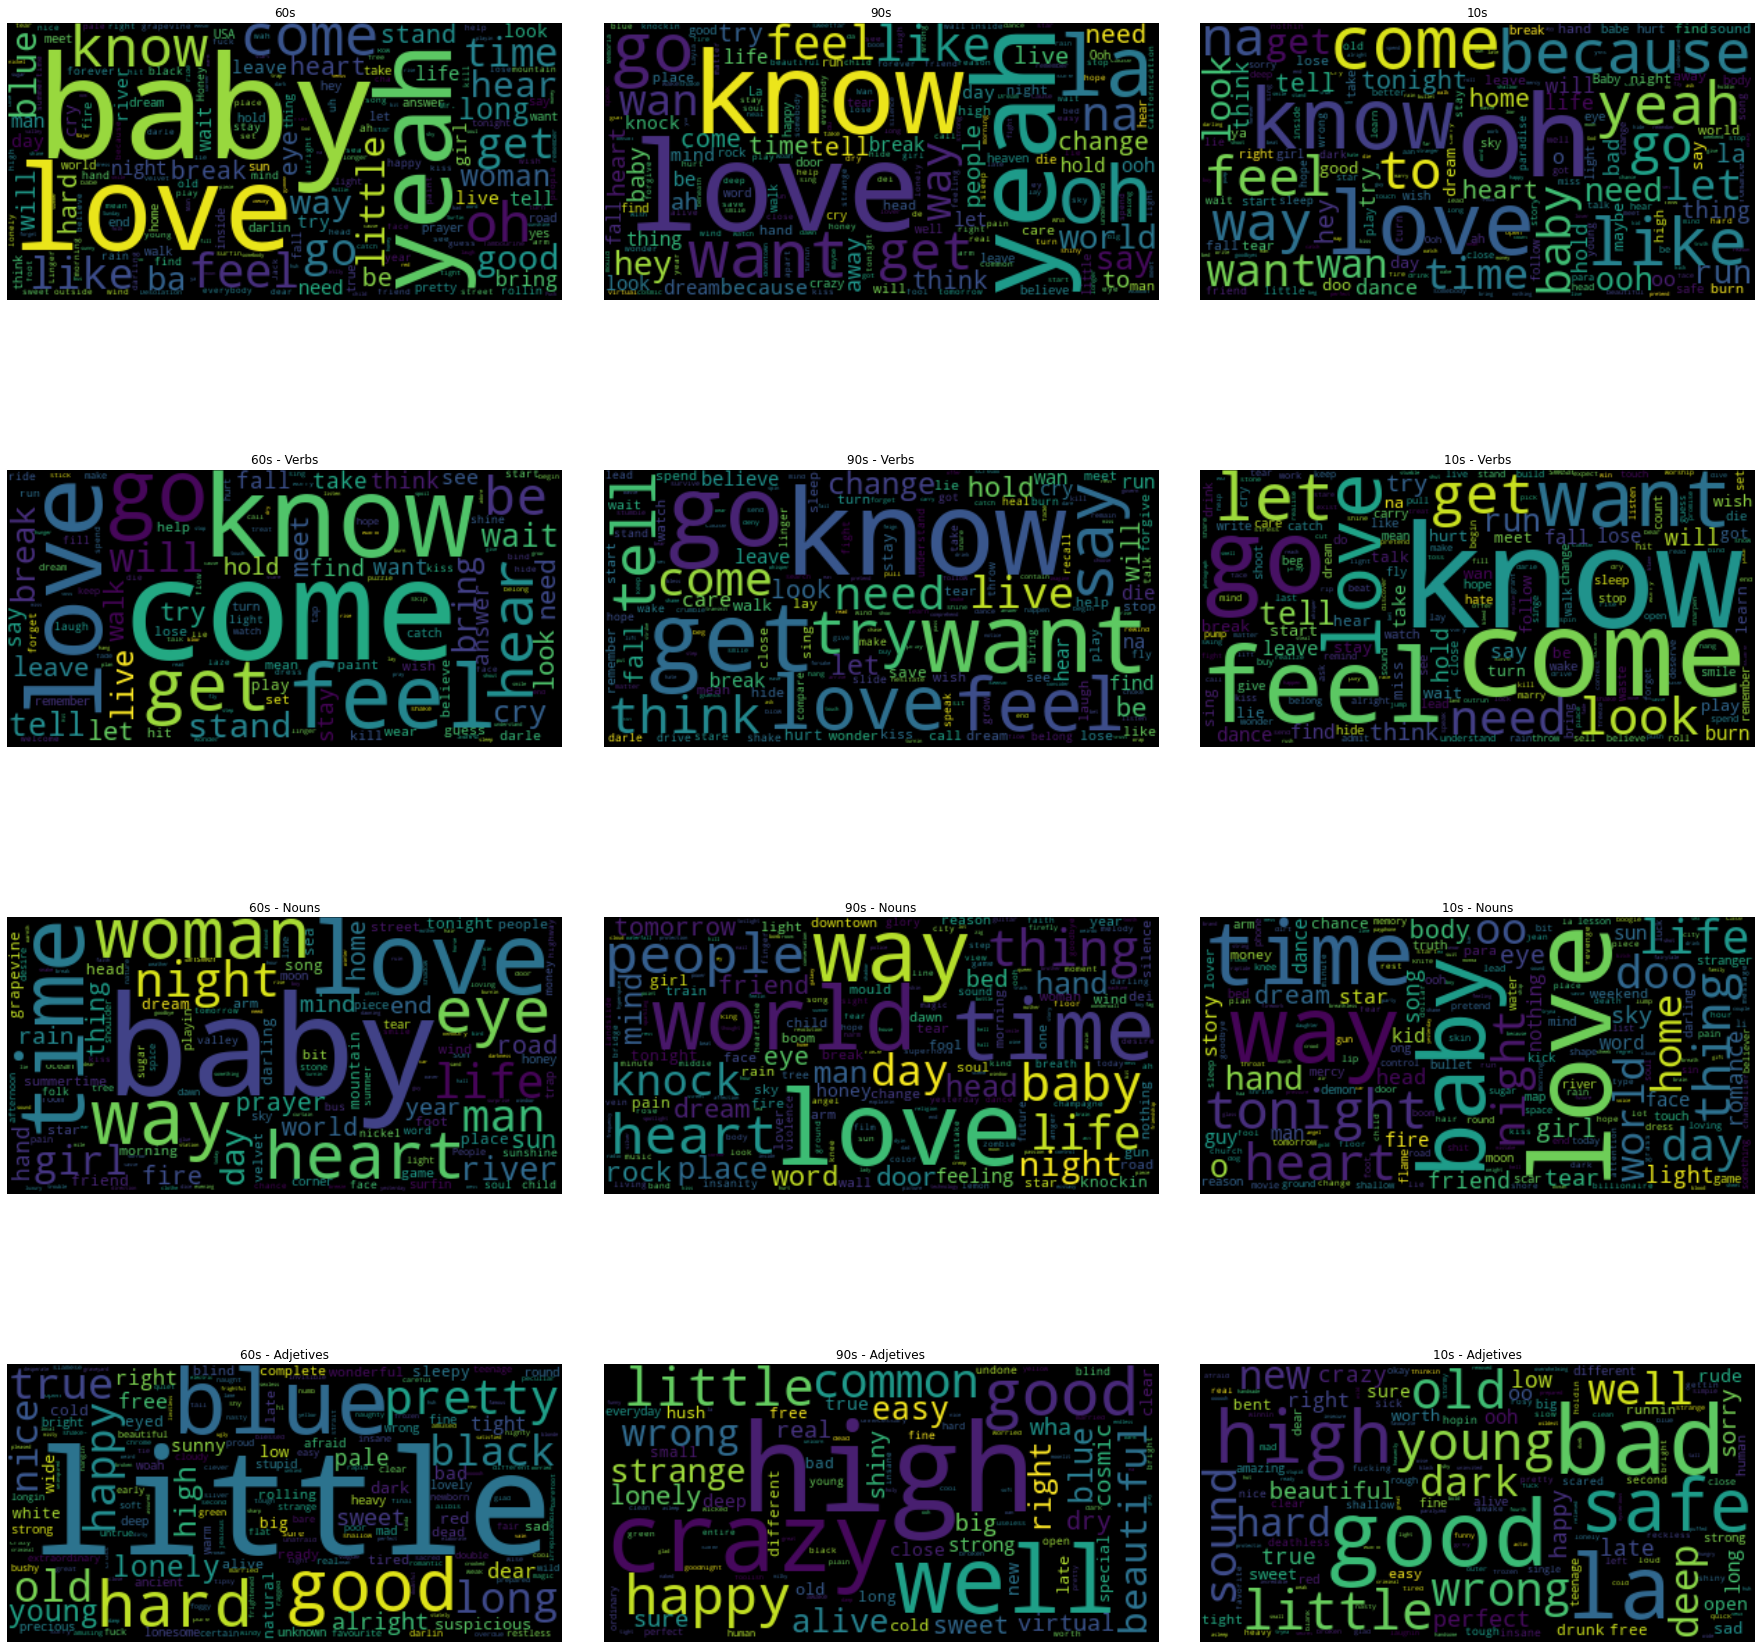

In [83]:
fig, axs = plt.subplots(4, 3, figsize=(25,25))
fig.tight_layout()

# 60s
wordcloud_60s = WordCloud()
wordcloud_60s.generate_from_frequencies(frequencies=dict_60s)
axs[0,0].set_title("60s")
axs[0,0].imshow(wordcloud_60s, interpolation="bilinear")
axs[0,0].axis("off")

wordcloud_verbs_60s = WordCloud()
wordcloud_verbs_60s.generate_from_frequencies(frequencies=dict_verbs_60s)
axs[1,0].set_title("60s - Verbs")
axs[1,0].imshow(wordcloud_verbs_60s, interpolation="bilinear")
axs[1,0].axis("off")

wordcloud_nouns_60s = WordCloud()
wordcloud_nouns_60s.generate_from_frequencies(frequencies=dict_nouns_60s)
axs[2,0].set_title("60s - Nouns")
axs[2,0].imshow(wordcloud_nouns_60s, interpolation="bilinear")
axs[2,0].axis("off")

wordcloud_adj_60s = WordCloud()
wordcloud_adj_60s.generate_from_frequencies(frequencies=dict_adj_60s)
axs[3,0].set_title("60s - Adjetives")
axs[3,0].imshow(wordcloud_adj_60s, interpolation="bilinear")
axs[3,0].axis("off")

# 90s
wordcloud_90s = WordCloud()
wordcloud_90s.generate_from_frequencies(frequencies=dict_90s)
axs[0,1].set_title("90s")
axs[0,1].imshow(wordcloud_90s, interpolation="bilinear")
axs[0,1].axis("off")
wordcloud_verbs_90s = WordCloud()
wordcloud_verbs_90s.generate_from_frequencies(frequencies=dict_verbs_90s)
axs[1,1].set_title("90s - Verbs")
axs[1,1].imshow(wordcloud_verbs_90s, interpolation="bilinear")
axs[1,1].axis("off")

wordcloud_nouns_90s = WordCloud()
wordcloud_nouns_90s.generate_from_frequencies(frequencies=dict_nouns_90s)
axs[2,1].set_title("90s - Nouns")
axs[2,1].imshow(wordcloud_nouns_90s, interpolation="bilinear")
axs[2,1].axis("off")

wordcloud_adj_90s = WordCloud()
wordcloud_adj_90s.generate_from_frequencies(frequencies=dict_adj_90s)
axs[3,1].set_title("90s - Adjetives")
axs[3,1].imshow(wordcloud_adj_90s, interpolation="bilinear")
axs[3,1].axis("off")

# 10s
wordcloud_10s = WordCloud()
wordcloud_10s.generate_from_frequencies(frequencies=dict_10s)
axs[0,2].set_title("10s")
axs[0,2].imshow(wordcloud_10s, interpolation="bilinear")
axs[0,2].axis("off")
wordcloud_verbs_10s = WordCloud()
wordcloud_verbs_10s.generate_from_frequencies(frequencies=dict_verbs_10s)
axs[1,2].set_title("10s - Verbs")
axs[1,2].imshow(wordcloud_verbs_10s, interpolation="bilinear")
axs[1,2].axis("off")

wordcloud_nouns_10s = WordCloud()
wordcloud_nouns_10s.generate_from_frequencies(frequencies=dict_nouns_10s)
axs[2,2].set_title("10s - Nouns")
axs[2,2].imshow(wordcloud_nouns_10s, interpolation="bilinear")
axs[2,2].axis("off")

wordcloud_adj_10s = WordCloud()
wordcloud_adj_10s.generate_from_frequencies(frequencies=dict_adj_10s)
axs[3,2].set_title("10s - Adjetives")
axs[3,2].imshow(wordcloud_adj_10s, interpolation="bilinear")
axs[3,2].axis("off")

plt.show()

### 4) Escribir un informe

Este informe tiene que describir qué datos que obtuvieron, el volumen de estos (# de canciones del artista, # de canciones de la competencia, etc), una explicación de cómo estos se relacionan con la pregunta planteada, cómo ayudan a responderla y los resultados que obtuvieron. Usar la celda de abajo con formato markdown.

# Informe

## Alumno: Daniel Cattaneo

## Motivación del trabajo

La música popular siempre fue un claro indicador de los temas que una sociedad tiene en su imaginario colectivo, las letras de las canciones mas escuchadas reflejan las preocupaciones, los valores y los deseos de los miembros de la sociedad.

A partir de esta premisa, surgió la motivación de este trabajo, ¿Es posible analizar características propias de algunas décadas de los últimos años? ¿Se verá reflejado estos cambios?

## Descripción de la metodología

Para poder responder las preguntas planteadas se realizarán los siguientes pasos:
1. Obtencion de datos relevantes
1. Limpieza de datos 
1. Análisis de datos.
1. Conclusiones

## Obtención de los datos

En primera instancia se elegieron las canciones a analizar, para esto, se seleccionaron tres playlists oficiales de Spotify que hacían una selección de los hits de distintas épocas, los 60s, los 90s y los 10s. Se seleccionaron estas décadas debido a que se encuentran lo suficientemente separadas entre sí como para esperar cambios significativos para poder analizar.

Habiendo elegido las playlists se debía obtener las letras de las canciones. Para esto se utilizó la API de genius, un servicio de información de canciones. En este paso surgieron múltiples complicaciones que demoraron el desarrollo del trabajo. En primer lugar la API era lenta, por lo que cada prueba tomaba minutos para obtener la información deseada. Además no funcionaba de manera confiable, debido a que en repetidas ocasiones traía datos que nada tenían con la canción elegida. Para esto se seleccionó manual las canciones que contenían las letras correctas y se descartaron aquellas que no podía encontrar su letra.

Habiendo solucionado estos problemas, se contaba con mas de 250 canciones para analizar, con un promedio de 80 por década.

## Limpieza de los datos

Con las letras obtenidas era hora de procesarlas utilizando técnicas de NLP (procesamiento de lenguaje natural). Estas fueron procesadas realizando en primer lugar una tokenización de las palabras, es decir detectar palabras, es decir detectar caracteres que tienen sentido en si mismos y aportan un significado a la oración. 

Luego se descartaron stop words, palabras comunes del lenguaje que no son relevantes para el análisis. Y finalmente se lematizaron las palabras, es decir que se busco la palabra raíz y de esta forma se facilita la agrupación de palabras con el mismo significado, sin tener en cuenta variaciones como mayusculas, plurales, conjugaciones, etc.

## Análisis

Para el análisis se parte de las palabras tokenizadas y lematizadas, se obtuvieron los n gramas con n=1 y n=2. Los bigramas no resultaron muy útiles debido a que eran pocos los que tenian sentido en si mismo y no respondían a frases repetidas muchas veces en una misma canción, por lo que no tenian sentido fuera de esta, es decir, en el conjunto de todas las canciones.

Se graficó en tres WordCloud las palabras mas usadas en cada época, utilizando los ngramas (con n=1) y sus frecuencias. 

En un primer vistazo resultaba dificil compararlos debido a que las palabras que aparecen son muy distintas y ademas las palabras mas usadas variaban en naturaleza, es decir que aparecían verbos, sustantivos, adjetivos, etc. todos juntos.

Es por ello que se subdividieron los ngramas por la función sintáctica de las palabras, es decir que se crearon 9 graficos mas, de sustantivos, verbos y adjetivos en cada época.

![Wordcloud de análisis](https://drive.google.com/uc?id=1ijUbqXorYHMO-5O71l19KbmNA0NhyVaJ)

## Conclusiones

Habiendo realizados los wordclouds de cada década divididos por categoría gramatical se encontraron las siguientes conclusiones.

En primer lugar no sorprende que la palabra amor (love) se encuentre en las tres décadas, debido a que es un sentimiento tan universal que siempre se ve presente en la música popular.

Luego se detectaron ciertas sutilidades en cada década, por ejemplo, en los años 60s se utiliza con gran frecuencia la palabra woman (señora), por lo que podemos dedicir que en esa época se hablaba con mayor formalismo que en las otras, era mas normal que para referirse al sexo femenino se utilice ese termino como forma de respeto.

Otro detalle encontrado en la época de los 90 es que es la única que tiene una gran frecuencia la palabra world (mundo) y esto pueede ser relacionado a las condiciones históricas que tuvo esta década. Cabe recordar que esta década nació con la caída del muro de Berlin, y por lo tanto la finalización de la guerra fría, que terminó con la división del mundo en las dos facciones nacidas a partir de la segunda guerra mundial. Y también estuvo marcada por el surgimiento y la popularidad de internet. Estas condiciones favorecieron a una concepción mas unificada del mundo y una reducción de las distancias en este.

Finalmente podemos agregar que en la década de los 10s es posible detectar una gran presencia de adjetivos con connotación negativa, como bad (malo), old (viejo), dark (oscuro). En las otras décadas primaban los adjetivos mas positivos y era dificil encontrar negativos. Esto nos puede hacer pensar que esta década tiene una visión mas pesimista de su mundo.